# Lab activity 3: From Histograms to Gaussians

The goal of this activity is to help you conceptualize the connections among counts (histograms), probability mass functions, and probability density functions;
to see a model estimated from data; 
and to hint at some ideas that we will revisit with a future topic.

To keep yourself active in this lab activity, you should

* Inspect the code, especially to understand how the libraries are being called.
* Look up documentation on the library calls to see what the options mean.
* Try out your own variations on the code.
* Improve the code (and let me know if you have a major improvement)

## 1. A simple histogram

Let's take the real-world phenomenon of how blueberries are distributed in pancakes if the blueberries are simply poured into the batter. The file <code>blueberries</code> contains raw data indicating blueberry counts in a sequence of pancakes. Grab the data and look at it. (This is original data that I collected myself one Saturday morning.)

In [1]:
import numpy as np
blueberries = np.loadtxt("/homes/tvandrun/Public/cs381/data/blueberries")

In [3]:
blueberries

array([ 4.,  4.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,
        8.,  8.,  9.,  9., 10., 10., 11.])

Are the number of blueberries normally distributed? This is the sort of phenomenon that we might expect to be fairly well modeled by a Gaussian. Let's find out if that's the case.

Now let's make a histogram out of that using numpy's histogram function. 
Look up how <code>np.histogram</code> works in the 
<a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">documentation</a>.
We want this to be a <i>normalized</i> histogram, essentially a probability mass function. 
The histogram function has a <i>density</i> option, which if set to true makes this histogram like a probability density function. To make it a probability <i>mass</i> function, we also need to make sure that the bins have width 1, so we set the boundaries of the bins explicitly.

In [4]:
bb_norm_hist = np.histogram(blueberries, bins=[4,5,6,7,8,9,10,11,12], density=True)
bb_norm_hist

(array([0.1 , 0.15, 0.25, 0.15, 0.1 , 0.1 , 0.1 , 0.05]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]))

Check that this is indeed a probability mass function, that the bins' probabilities sum to one. 

In [5]:
sum(bb_norm_hist[0])

1.0

Notice in the histogram itself that the x values are in row 1, y in row 0. In fact, row 1 has the bin boundaries, so it has one more entry than there are bins; consequently we ignore that last entry when we interpret row 1 as the x values.

In [6]:
bb_norm_hist[1][:-1]

array([ 4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
bb_norm_hist[0]

array([0.1 , 0.15, 0.25, 0.15, 0.1 , 0.1 , 0.1 , 0.05])

Let's see what that histogram looks like.

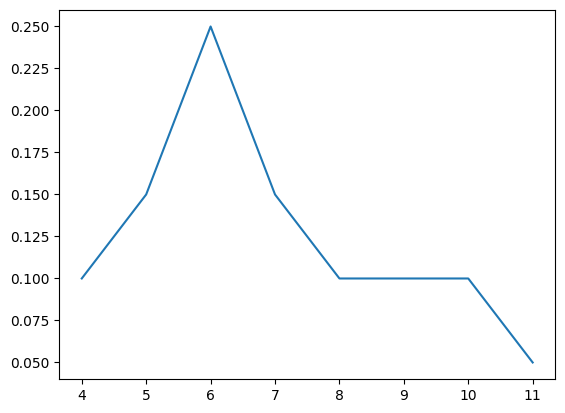

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(bb_norm_hist[1][:-1], bb_norm_hist[0])
plt.show()

Does it look normally distributed to you?

## 2. Fitting a Gaussian

Recall that the parameters to the Gaussian distribution are the mean and the variance (or standard deviation, which is the square root of the variance).
Also recall that computing the maximum likelihood Gaussian from data is easy:
just compute the mean and standard deviation directly from their definitions.
It's even easier if you have library functions to do that for you.

In [9]:
mu = np.mean(blueberries)

In [10]:
sigma = np.sqrt(np.var(blueberries))

Let's plot the Gaussian probability density function for this data. The function scipy.stats.norm.pdf acts as that probability density function with x (the value at which
to compute a probability density) and mu and sigma are parameters.

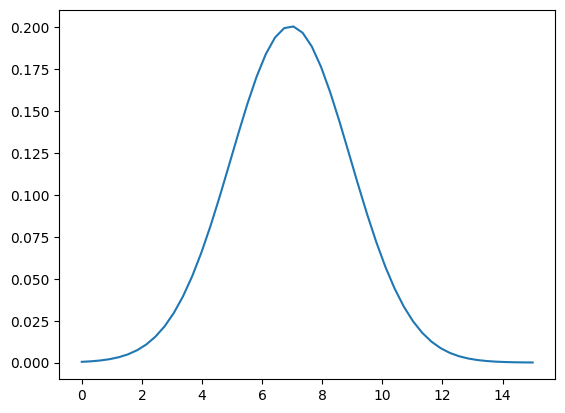

In [11]:
from scipy.stats import norm
display_range = np.linspace(0, 15)
plt.plot(display_range, norm.pdf(display_range, mu, sigma))
plt.show()

But does that fit our data? Does it support our hypothesis of normal distribution of blueberries? Let's plot them both together.

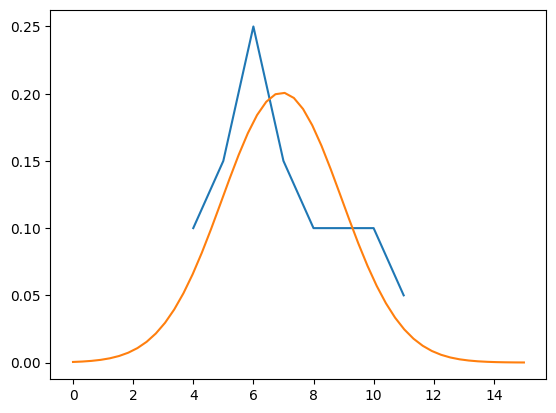

In [12]:
plt.plot(bb_norm_hist[1][:-1], bb_norm_hist[0])
plt.plot(display_range, norm.pdf(display_range, mu, sigma))
plt.show()

It's not too far off. What do you think?

## 3. More data

Let's try a similar experiment with more (and professionally managed) data.
In the data folder is a file containing a dataset from Kaggle about weight and height
information for 10000 individuals. [Here's where I got it from](https://www.kaggle.com/mustafaali96/weight-height).
(Disclaimer: Although this data set is widely used, its origin is obscure and is almost certainly
simulated data, not real.
It will work for our purposes, though.)

This time we'll read it in as a Pandas dataframe. Then take a look at it.

In [13]:
import pandas as pd
heightweight = pd.read_csv("/homes/tvandrun/Public/cs381/data/weight-height.csv")

In [15]:
heightweight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Looking at height in particular...

In [16]:
heightweight["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [18]:
min(heightweight["Height"])

54.2631333250971

In [20]:
max(heightweight["Height"])

78.9987423463896

Let's see what its (normalized) histogram looks like. This time we won't force the bins to have width 1, so this is a probability density function, not a probability mass function.

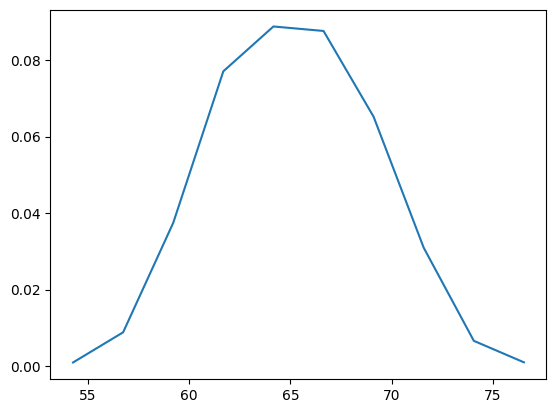

In [22]:
wh_norm_hist = np.histogram(heightweight["Height"], bins=10,density=True)
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.show()

It looks somewhat Gaussian, but we'll get a sharper image with more bins.

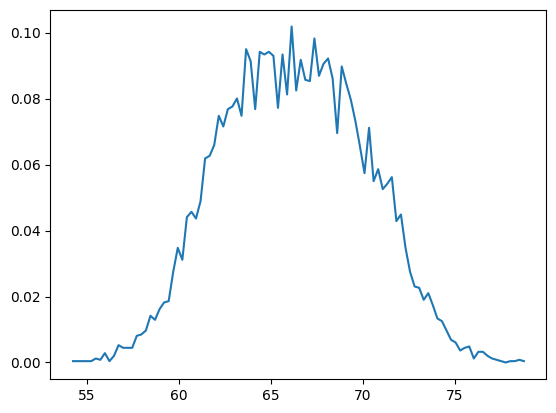

In [23]:
wh_norm_hist = np.histogram(heightweight["Height"], bins=100,density=True)
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.show()

Looks a little spikey. But let's see how well a Gaussian fits to it.

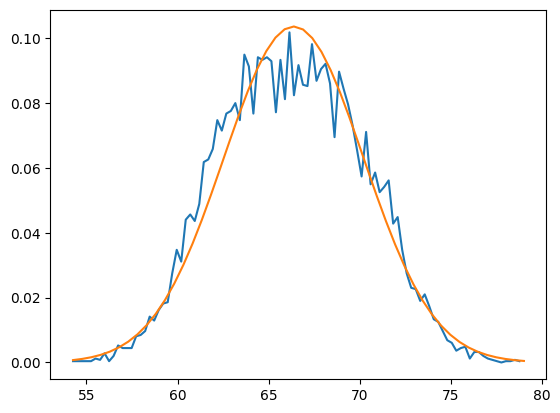

In [24]:
mu = np.mean(heightweight["Height"])
sigma = np.sqrt(np.var(heightweight["Height"]))
display_range = np.linspace(min(heightweight["Height"]), max(heightweight["Height"]))
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.plot(display_range, norm.pdf(display_range, mu, sigma))
plt.show()

Not bad, but not great. There are noticable places where the Gaussian estimation and the histogram are off from each other.

## 4. When two Gaussians are better than one

Our assumption that human height is normally distributed didn't use a bit of prior knowledge: height is distributed differently for males and females. Our dataset in fact lets us differentiate, since it contains a gender attribute. Looking only at male height, for example: 

In [25]:
heightweight[heightweight.Gender=="Male"]["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
4995    68.860062
4996    68.973423
4997    67.013795
4998    71.557718
4999    70.351880
Name: Height, Length: 5000, dtype: float64

Now let's make separate histograms for the male and females in the data set.

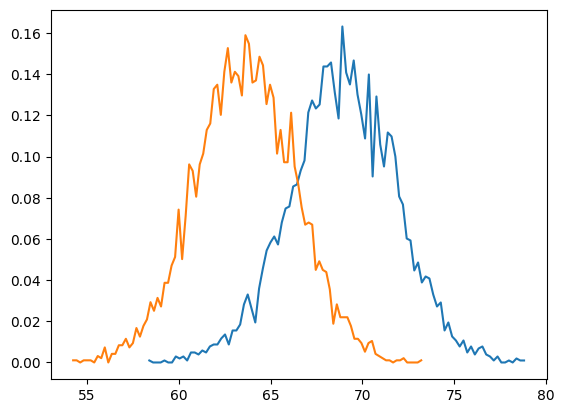

In [26]:
male_height = np.histogram(heightweight[heightweight.Gender=="Male"]["Height"], bins=100,density=True)
female_height = np.histogram(heightweight[heightweight.Gender=="Female"]["Height"], bins=100,density=True)
plt.plot(male_height[1][:-1], male_height[0])
plt.plot(female_height[1][:-1], female_height[0])
plt.show()

Not only are there clearly distinct distributions, but they <i>each</i> look Gaussian.
Let's try to fit a Gaussian just to the male data.

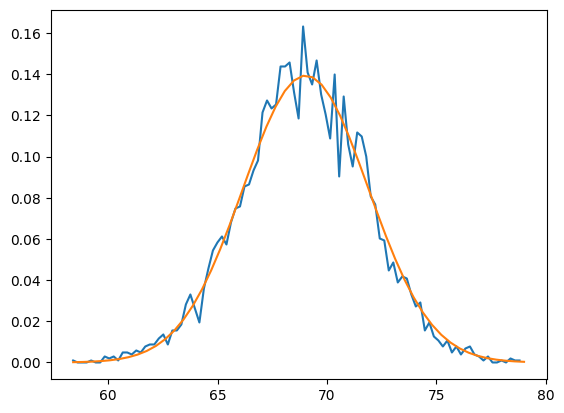

In [28]:
male_heights = heightweight[heightweight.Gender=="Male"]["Height"]
male_mu = np.mean(male_heights)
male_sigma = np.sqrt(np.var(male_heights))
display_range = np.linspace(min(male_heights), max(male_heights))
plt.plot(male_height[1][:-1], male_height[0])
plt.plot(display_range, norm.pdf(display_range, male_mu, male_sigma))
plt.show()

It seems what we really need is a <i>mixture of Gaussians</i>. The function human_height below acts like a probability density function on x. It is the linear combination of two Gaussian distributions combined under the assumption that a random individual has at 50/50 chance of being male or female.

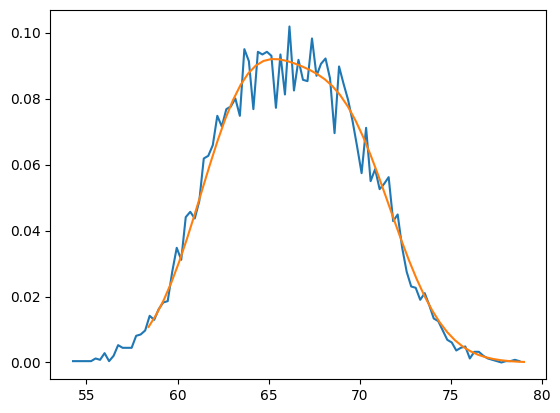

In [29]:
female_heights = heightweight[heightweight.Gender=="Female"]["Height"]
female_mu = np.mean(female_heights)
female_sigma = np.sqrt(np.var(female_heights))
def human_height(x) :
    return .5 * norm.pdf(x, male_mu, male_sigma) + .5 * norm.pdf(x, female_mu, female_sigma)
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.plot(display_range, human_height(display_range))
plt.show()

Now that hits it. One important factor here was that we knew which data points were male and which were female, so we could choose which ones to use to calculate the male mu and sigma and which for the female. But what if we had only the height data, not tagged by gender? We would still have good reason to expect that the probability density function is a mixture of two Gaussians, but we'd have to "guess" at which data points were male and which were female, and also guess at what the proportion is male vs female. But we could use that guess to see how well our model fits the data---and use that result to improve our guess. This process is iterated until the model performs adequately on the data. More on this iterative process later this week...

## 5. Treating mixtures as a single distribution

Just for illustrative purposes, I threw together the following class to represent Gaussian mixture models.
The idea is that any instance of this class is a probability density function
composed of Gaussian pdfs.
It is itself callable, that is, it acts like a pdf.
If variable <code>p</code> refers to a <code>MixedGaussian</code>, then you can call <code>p(x_i)</code>
for some data point <code>x_i</code>.
But also it is indexable, that is, you can retrieve the jth weighted Gaussian.
The expression <code>p[i](x_i)</code> finds the probability of <code>x_i</code> in the jth component model
(weight included).

Think through this code carefully.
I don't know if this is the most Pythonic approach, but to my object-oriented mind it seemed like
the right thing to do---and perhaps it helps you as well.

In [30]:
class MixedGaussian :
    # pi, mu, and sigma are lists. pi[j], for example, is the mixing coefficient for the jth component
    def __init__(self, pi, mu, sigma):
        self.k = len(pi)
        assert self.k == len(mu)
        assert self.k == len(sigma)
        self.pi = pi
        self.mu = mu
        self.sigma = sigma
    
    # Retrieve the jth weighted component (returned as a pdf)
    def __getitem__(self, j):
        return lambda x : self.pi[j] * norm.pdf(x, self.mu[j], self.sigma[j]) 
    
    # Act like a pdf
    def __call__(self, x):
        return  sum(self[j](x) for j in range(self.k))
    
    def __str__(self):
        return " + ".join([str(self.pi[j]) + "N(" + str(self.mu[j]) + "," + str(self.sigma[j])+")" for j in range(self.k)])


Let's assemble the previous example as an instance of this class.

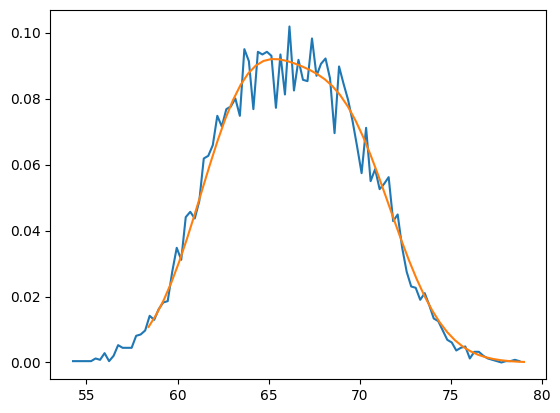

In [31]:
human_height2 = MixedGaussian([.5, .5], [male_mu, female_mu], [male_sigma, female_sigma])
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.plot(display_range, human_height2(display_range))
plt.show()

## 6. Trying this out on other data

The iris data set has information on three species of iris, with four measurements each (petal and sepal length and width). 
It seems reasonable to expect that any of these measurements are normally distributed, and
that there would be a different distribution for each species.
If that is the case, then the distribution of measurements accross species could
be modeled using a mixture of Gaussians.

Load the iris data set and display histograms for each of the measurements.

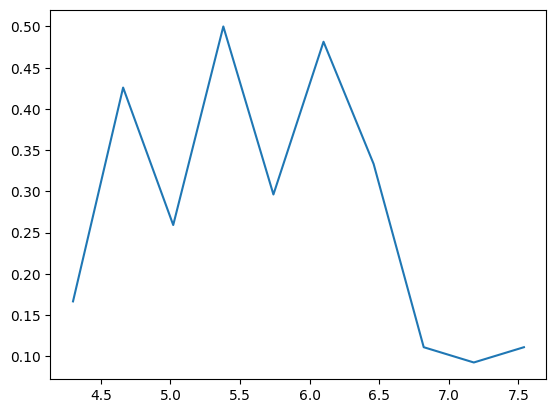

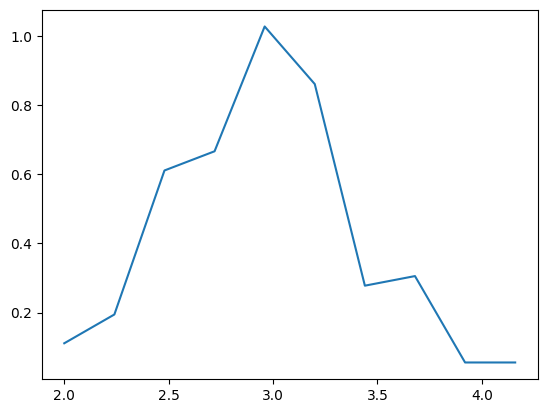

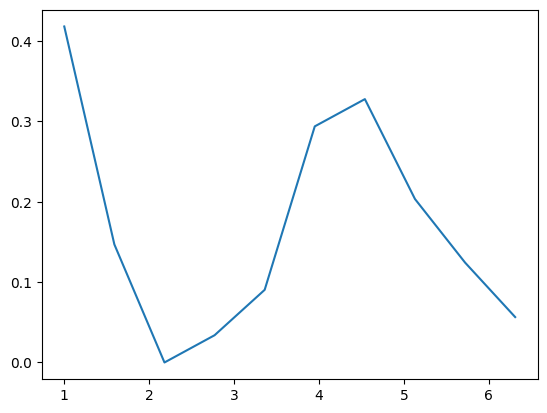

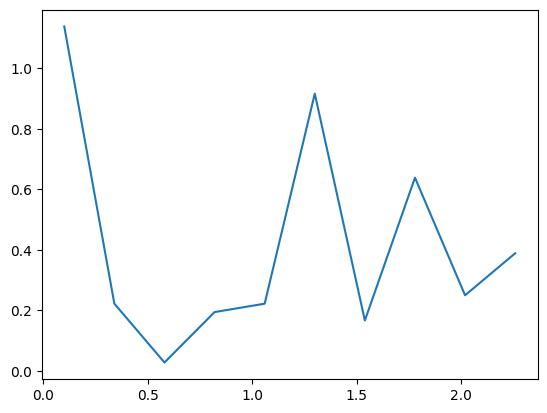

In [32]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
for i in range(4):
    hist = np.histogram(iris_dataset.data[:, i], density=True)
    plt.plot(hist[1][:-1], hist[0])
    plt.show()

Now let's separate these measurements by species, which is easy to do in this data set 
because the species are grouped together in sections of 50, with 150 datapoints altogether.
Here we plot each measurement separately, with histograms for each species distinguished by color

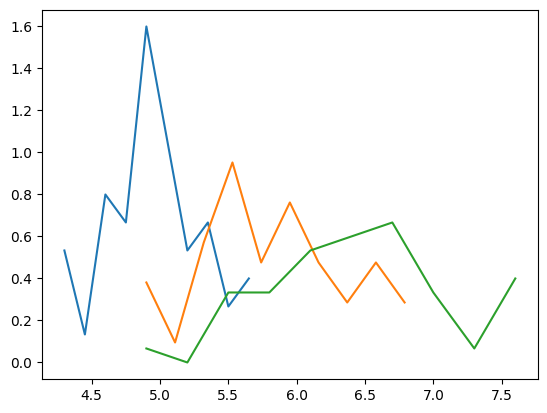

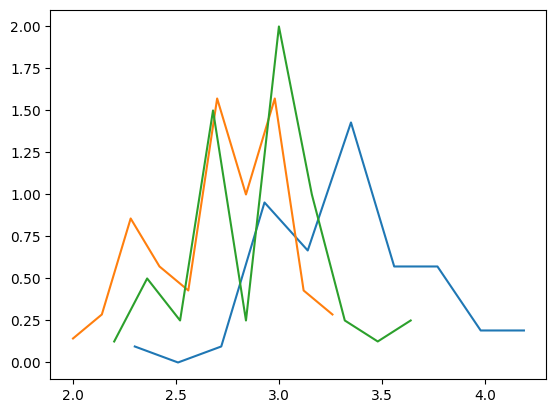

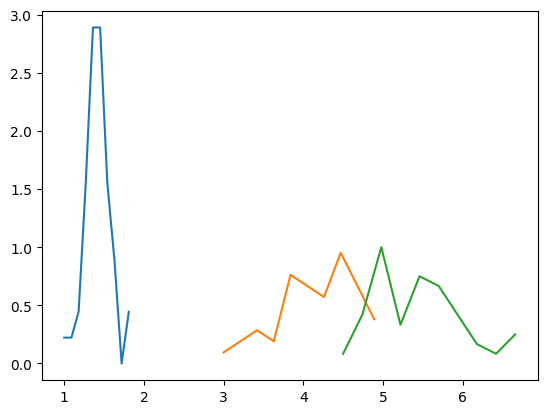

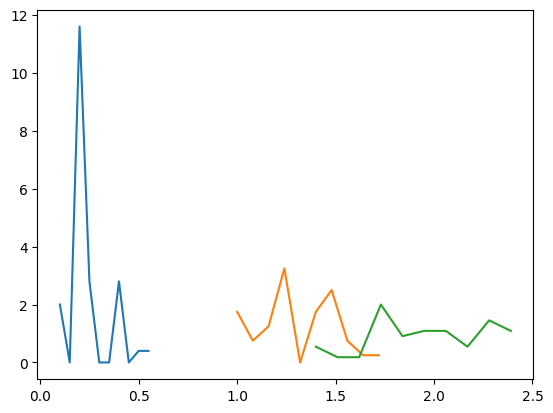

In [33]:
for i in range(4):
    hists = [np.histogram(iris_dataset.data[(j*50):((j+1)*50), i], density=True) for j in range(3)]
    for j in range(3):
        plt.plot(hists[j][1][:-1], hists[j][0])
    plt.show()

The histograms are a bit spikey, but part of that is because the data is sparse, with only 50 readings
in each case.
Now, compute a mixture of Gaussians for one of these measurements (your choice), and see
how well the mixture model fits the combined histogram.


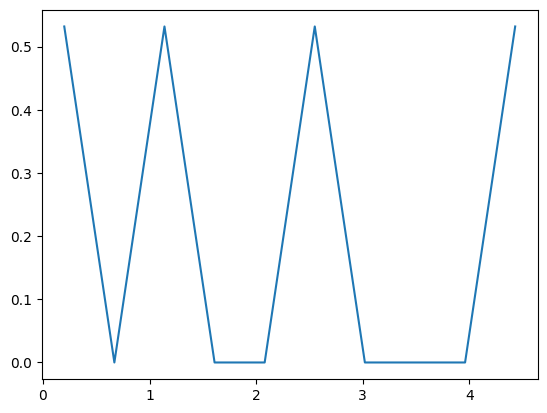

In [53]:
wh_norm_hist = np.histogram(iris_dataset.data[:][1], bins=10,density=True)
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.show()

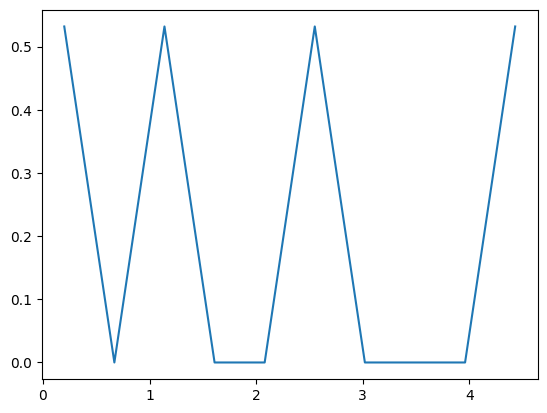

In [41]:
portion = iris_dataset.data[:][1]
IrisMeasurements = MixedGaussian([.333, .333, .334], [np.mean(portion[0:50]), np.mean(portion[50:100]), np.mean(portion[100:150])], [np.sqrt(np.var(portion[0:50])), np.sqrt(np.var(portion[50:100])), np.sqrt(np.var(portion[100:150]))])
plt.plot(wh_norm_hist[1][:-1], wh_norm_hist[0])
plt.plot(display_range, IrisMeasurements(display_range))
plt.show()

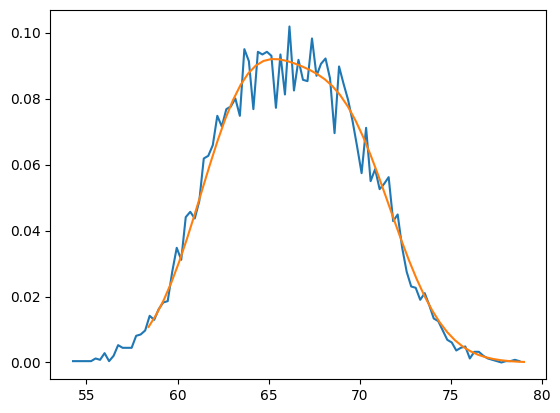

In [31]:
human_height2 = MixedGaussian([.5, .5], [male_mu, female_mu], [male_sigma, female_sigma])


## Gaussian mixtures on multivariate data

Probability models, including normal distributions, can be extended to multiple dimensions. Let's look at the height-weight data again, this time plotting height against weight and differentiating between male and female data points.

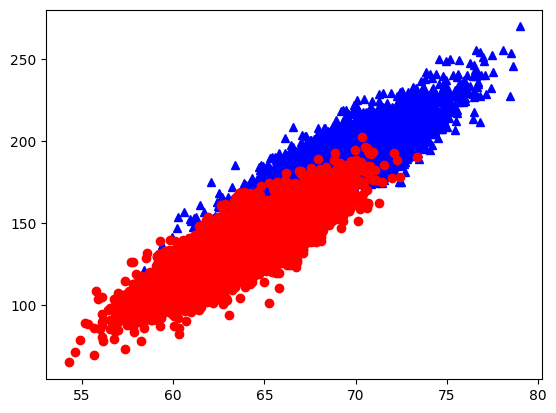

In [42]:
plt.plot(heightweight[heightweight.Gender=="Male"]["Height"],
         heightweight[heightweight.Gender=="Male"]["Weight"], "b^")
plt.plot(heightweight[heightweight.Gender=="Female"]["Height"],
         heightweight[heightweight.Gender=="Female"]["Weight"], "ro")



The plot is a bit crowded. Let's randomly set aside a smaller portion as we would when splitting into training set and test set, and then plot the smaller portion.

In [43]:
from sklearn.model_selection import train_test_split
hw_train, hw_test = train_test_split(heightweight, test_size=.1) # Just grab 10%

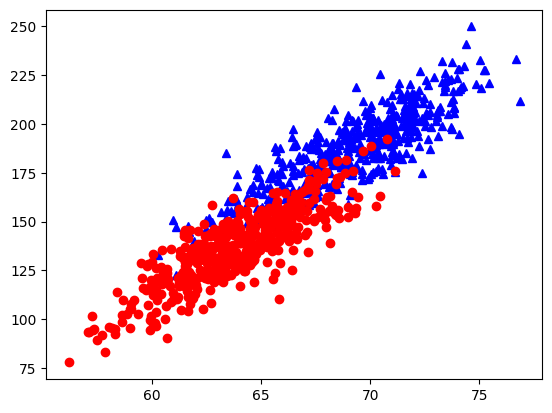

In [44]:
plt.plot(hw_test[hw_test.Gender=="Male"]["Height"],
         hw_test[hw_test.Gender=="Male"]["Weight"], "b^")
plt.plot(hw_test[hw_test.Gender=="Female"]["Height"],
         hw_test[hw_test.Gender=="Female"]["Weight"], "ro")


Each portion of the data looks elipsoid, and in fact they are distributed in a higher-dimensional equivalent to a bell curve. 

We can use `sklearn`'s own implementation of Gaussian Mixture models to fit this. 

In [45]:
from sklearn.mixture import GaussianMixture
hwmix = GaussianMixture(2).fit(hw_train[["Height","Weight"]])

We can visualize the probabilities as contours indicating the probability of a datapoint being that far away from the mean. (The contours are measured in negative log probabilities, not stright-up probabilities) We'll also plot the "test" data, undifferentiated between male and female.

/penv/lib64/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


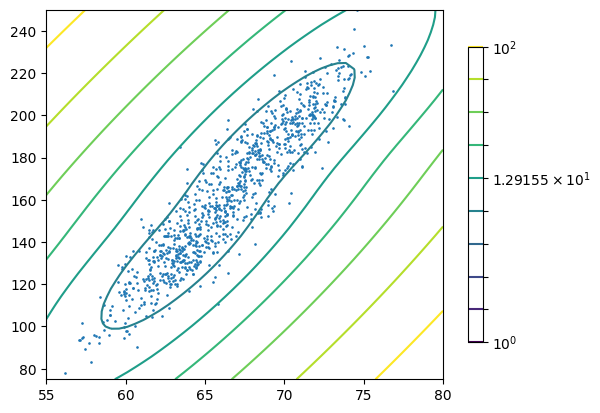

In [46]:
# Adapted from https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
from matplotlib.colors import LogNorm

x = np.linspace(55., 80.)
y = np.linspace(75., 250.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
# This line will result in a warning about not having value feature names. Don't worry about that.
Z = -hwmix.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0), levels=np.logspace(0, 2, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(hw_test["Height"], hw_test["Weight"], 0.8)


Let's see what it found for means.

In [47]:
hwmix.means_

array([[ 69.0587669 , 186.96256942],
       [ 63.62647498, 135.51149736]])

This indicates that one group had a mean height of about 64 cm and a mean weight of about 135 kg; the other group had a mean height of about 69 cm and a mean weight of about 187 kg.
(Exact values and the order in which the groups are listed will depend on how your training set was chosen, among other factors.)

But wait a minute... we never told `GaussianMixture.fit()` which data points were male and which were female---we merely gave it the height and weight data. How did it know which was which???

Go peruse the [documentation for `GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), including the section of the User Guide that is linked from the API page. You'll see references to the expectation-maximization (EM) algorithm, which is able to fit a model to data even when certain information is missing (in this case, gender). We did need to tell `GaussianMixture` that there were *two* groups that it should look for. (Can you find where?)

Time permitting, run this again on the iris data (using any two of the four attributes, but without the targets. Since the iris dataset is much smaller, this may not work as well. 